<a href="https://colab.research.google.com/github/atharvak08/ML_LAB/blob/main/prac5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the Iris dataset from sklearn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
# Load the Iris dataset to a variable
iris = load_iris()
# Load the data into 2 different pandas dataframes. 
# X for the features
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# y for the targets
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
# Let's explore our features.
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


What we are seeing here are measurements taken for many different plants. Each row represents one set of measurements taken from one plant.
So according to this data, the first plant (row 0) has the following measures:

- Sepal length in cm = 5.1
- Sepal width in cm = 3.5
- Petal length in cm = 1.4
- Petal width in cm = 0.2

We can now explore our target data `y` to see to what family this plant belongs.

In [ ]:
print(y)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


Our target data (or column) specifies what plant familiy does the row belong to. So our `row 0` plant, which we listed the measurements above, belongs to the family `setosa`. What we have here is called **Categorical** data. This is because the target column can only have 3 possible values (`setosa`, `virginica` or `versicolor`).

Machine learning models don't handle categorical data as efficiently as they can handle `boolean` values (0 or 1, True or False), so extracting `dummy` columns from this categories is usually a good step when preparing our data. 

Another example of this would be `Gender`. A dataset of people comes with a column `Gender` and each row contains either of the values `Male` of `Female`. Using pandas `.get_dummies()` the resulting dataset would have no column called `Gender` but instead 2 columns (`Male` and `Female`) with a 0 or a 1.

In [ ]:
# Convert categorical data into dummy/indicator variables.
y = pd.get_dummies(y)

In [ ]:
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Remember this was originally one single column with the posible values: `setosa`, `versicolor` and `virginica`. Thanks to pandas function `.get_dummies()` we can easily convert this single categorical column into 3 different ones (one per possible origina value) with values `0` or `1`. 

## Creating and Training our model

Now that we got our data prepared and rid of that `Categorical` column we can proceed to create our model.

Remember, when going through this process it is important to keep some of our data apart. We do not want to use our whole dataset to train our model because we wouldn't have any data left to test it. If we feed the model the same data we used to train it as test data we are cheating ourselves. The model will know that data since it was trained on it and will very likely classify correctly, but would we know if our model would work out in the real world with new data? We can't be confident about it.

So, keeping this in mind, we usually split our data into 2 sets: **Training Data** and **Testing Data**. Around 75% training - 25% testing is reasonable. 

For this we are going to use the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn, a helper function just for this purpose. It was many parameters you can explore in the linked docs but if we don't pass them in when calling the function it defaults to the 75% - 25% split we want.

In [ ]:
# import the function
from sklearn.model_selection import train_test_split

# Split our data into the training sets and the testing sets
# Each set has a pair of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
## Import and create the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train our model with our training data.
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Visualization

We are going to use some tools to display the tree resulting from our data.

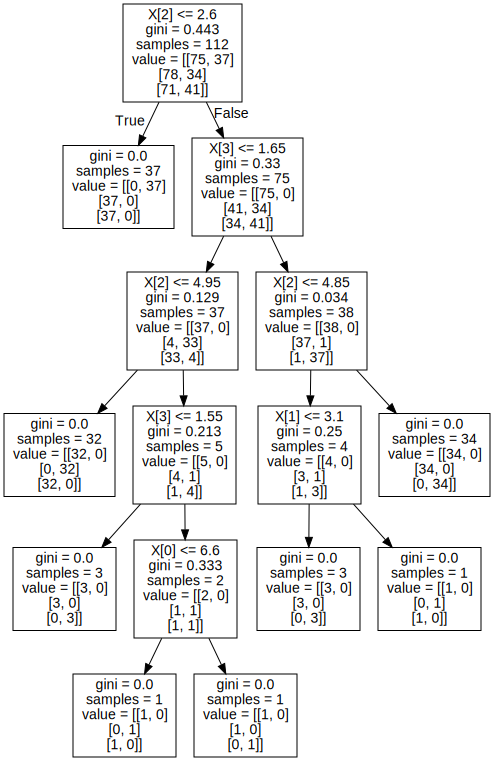

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

display(graphviz.Source(export_graphviz(dt)))

Let's analyze the first node.
```
X[2] <= 2.6
gini = 0.443
samples = 112
```

What is this telling us? Several things:

- `X[2] <= 2.6`: Our model seems to have decided that the first feature it wants to make a decision on is number 3 (remember python `lists` start at index 0). This feature is `petal length (cm)`. It also chose 2.6 as the dividing value.
- `gini`: The impurity of the node. Remember that long calculation we talked about?
- `samples`: The amount of training samples that went through this node. In this case all of them since it's the first node.

Looking at the left child node of this first node we find a `leaf`. **Leaves** are end nodes, nodes that do not have children. When a sample reaches a leaf node it is already classified. In our case, looking at the values, we can see that **37** training values landed on this end node and we're all classified as type 1 (`setosa`).

The right child on the the other hand makes another split and continues the tree, making more decisions down the road until classifing the samples.


## Testing and measuring performance

The final step in this process is testing the resulting model with new data and seeing how it behaves. For this we are going to use the set of **testing** data we split from the main dataset earlier.

In [ ]:
# Call the .predict() function of the model and feed in the testing data
y_pred = dt.predict(X_test)

In [ ]:
# To analyze the accuarcy of our models predictions we are going to use a confusion matrix. You can read more about this matrix online, but basically we want
# know how many samples of each type were correctly classified. The matrix is going to tell us how many samples of each type were classified and to which target type.

from sklearn.metrics import confusion_matrix
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

#Results


We have 3 different classifications our data can be placed into. This confusion matrix is telling us that the model predicted:

Setosa (type 1) => Samples: 13, Correctly classified: 13

Versicolor (type 2) => Samples: 15, Correctly classified: 15. 1 sample was incorrectly classified as type 3.

Virginica (type 3) => Samples: 9, Correctly classified: 9

So our model only was wrong once in 37 samples.